# Project: Investigate a Dataset IMDB movies

## Table of Contents
<ul><br>
<li><a href="#intro">Introduction</a></li><br>
<li><a href="#wrangling">Data Wrangling</a></li><br>
<li><a href="#eda">Exploratory Data Analysis</a></li><br>
<li><a href="#conclusions">Conclusions</a></li><br>
</ul>

<a id='intro'></a><br>
## Introduction<br>
We are going to inspect the dataset provided by kaggle on the TMDB website, the dataset contains a great collection of movies from 1960 to 2015 with some observational properties like runtime, budget, revenue, release year and many more.<br>
<br>
#### Questions to be answered:<br>
1. What genre is most popular over the years<br>
2. Which genre is the most popular from year to year?<br>
3. Top 10 directors who produced the highest number of movies over the years<br>
4. What are the top 5 movie profits?<br>
5. What are the least 5 movie profits?

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes= True, style= 'darkgrid')
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
#Takes a dataframe category column and gets the frequency of each category
def get_cat (df):
    df=df.str.get_dummies(sep='|').sum().reset_index()
    return df

<a id='wrangling'></a><br>
## Data Wrangling<br>
### General Properties

#### Reading the dataset

In [10]:
tmdb=pd.read_csv('/home/adora/github/ITI/data/tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
tmdb['budget'].value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
51500000       1
25500000       1
1350000        1
7920000        1
4653000        1
Name: budget, Length: 557, dtype: int64

In [12]:
tmdb['revenue'].value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
53676580        1
617000          1
13001257        1
504050219       1
20518905        1
Name: revenue, Length: 4702, dtype: int64

#### Getting information about the shape of the dataset and inspecting for null values

In [13]:
tmdb.shape

(10866, 21)

In [14]:
list(tmdb.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [15]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning <br>
#### Dropping some unnecessary Columns

In [16]:
tmdb=tmdb.drop(columns=['homepage','imdb_id','tagline','budget_adj','revenue_adj','overview'])

#### Filling null values with the mean for the columns of int and float datatypes

In [17]:
tmdb.fillna(tmdb.mean(), inplace=True)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
dtypes: float64(2), int6

#### Inspecting for duplicate rows

In [18]:
sum(tmdb.duplicated())

1

#### Eliminating duplicated rows

In [19]:
tmdb.drop_duplicates(inplace=True)
sum(tmdb.duplicated())

0

#### Fixing data types:<br>
converting 'release_date' data type from object to datetime

In [20]:
tmdb['release_date']=pd.to_datetime(tmdb['release_date'])
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   keywords              9372 non-null   object        
 8   runtime               10865 non-null  int64         
 9   genres                10842 non-null  object        
 10  production_companies  9835 non-null   object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_count            10865 non-null  int64         
 13  vote_average    

#### Checking for the number of null values in each column

In [21]:
tmdb.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### Separating object columns from numeric columns for ease of analysis and using 'release_year' column as a key refrence 

In [22]:
tmdb_obj=tmdb.loc[:,['original_title','cast','director','keywords','genres','production_companies','release_year']]
tmdb_obj.head()

,original_title,cast,director,keywords,genres,production_companies,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


#### Rechecking for the null values in the object columns dataframe

In [23]:
tmdb_obj.isnull().sum()

original_title             0
cast                      76
director                  44
keywords                1493
genres                    23
production_companies    1030
release_year               0
dtype: int64

#### Eliminating null rows

In [24]:
tmdb_obj=tmdb_obj.dropna()
tmdb_obj.isnull().sum()

original_title          0
cast                    0
director                0
keywords                0
genres                  0
production_companies    0
release_year            0
dtype: int64

#### Checking for number of rows in the object dataframe

In [25]:
tmdb_obj.count()

original_title          8666
cast                    8666
director                8666
keywords                8666
genres                  8666
production_companies    8666
release_year            8666
dtype: int64

<a id='eda'></a><br>
## Exploratory Data Analysis

### Research Question 1 : What genres are the most popular over the years?

In [26]:
tmdb_gen=tmdb_obj.copy()

#### Getting the number of the movies produced for each genre over ther years

In [27]:
genre=get_cat(tmdb_gen['genres'])
genre

,index,0
0,Action,2022
1,Adventure,1271
2,Animation,512
3,Comedy,3050
4,Crime,1200
5,Documentary,270
6,Drama,3934
7,Family,946
8,Fantasy,763
9,Foreign,90


In [31]:
#converting the output into a dataframe for ease of use
gen=pd.DataFrame(genre)
gen.columns

Index(['index', 0], dtype='object')

In [32]:
#sorting the output values
gen=gen[['index',0]].sort_values(0, ascending=False)

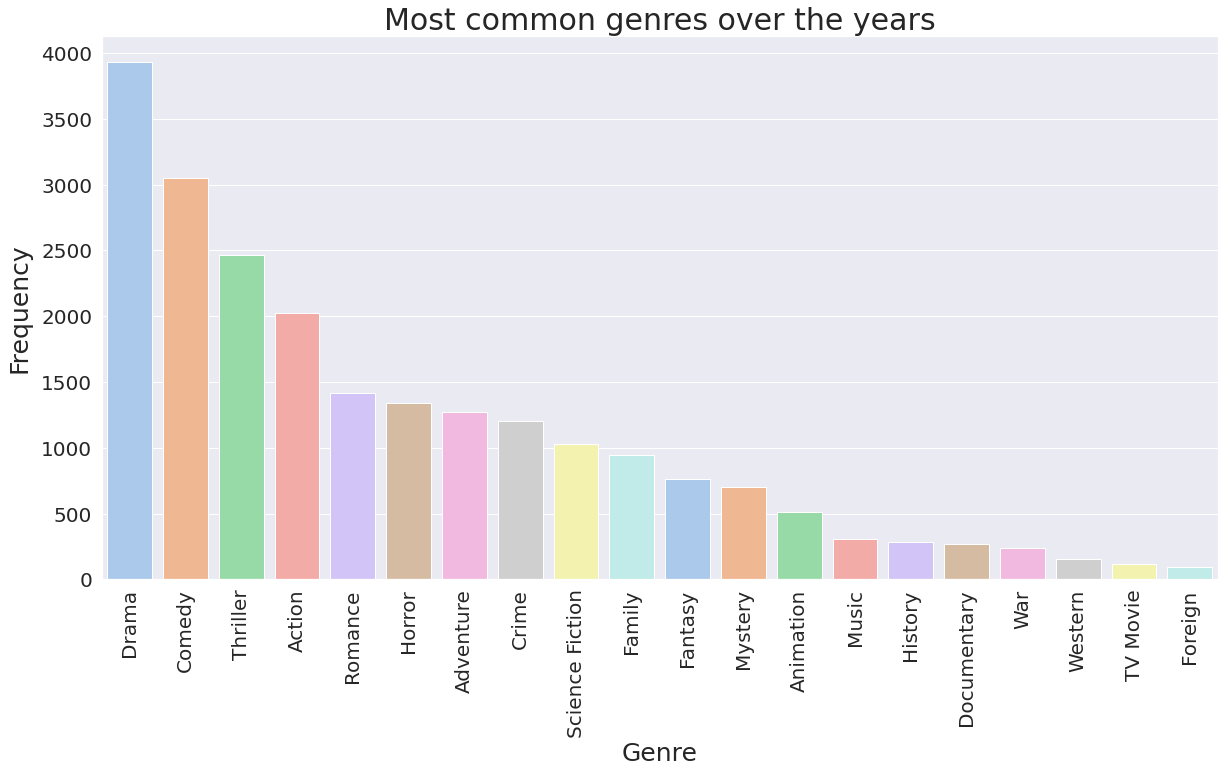

In [33]:
#plotting genre vs count
plt.figure(figsize=(20,10))
sns.barplot(x='index', y=0, data= gen, palette='pastel')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Genre', fontsize=25)
plt.ylabel('Frequency', fontsize=25, labelpad=10)
plt.title('Most common genres over the years', fontsize=30)
plt.show()

#### We can conclude that the most 5 common genres over the years are:<br>
1. Drama<br>
2. Comedy<br>
3. Thriller<br>
4. Action<br>
5. Romance

### Research Question 2 : What genre is most popular from year to year?

In [34]:
#concatinating the new categorical columns with the original dataframe 
#and droping the original 'genres' column
dummies=tmdb_gen['genres'].str.get_dummies(sep='|')
gen_df=pd.concat([tmdb_gen, dummies], axis=1).drop(["genres"], axis=1)
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   original_title        8666 non-null   object
 1   cast                  8666 non-null   object
 2   director              8666 non-null   object
 3   keywords              8666 non-null   object
 4   production_companies  8666 non-null   object
 5   release_year          8666 non-null   int64 
 6   Action                8666 non-null   int64 
 7   Adventure             8666 non-null   int64 
 8   Animation             8666 non-null   int64 
 9   Comedy                8666 non-null   int64 
 10  Crime                 8666 non-null   int64 
 11  Documentary           8666 non-null   int64 
 12  Drama                 8666 non-null   int64 
 13  Family                8666 non-null   int64 
 14  Fantasy               8666 non-null   int64 
 15  Foreign               8666 non-null  

In [35]:
#checking the most popular genre per year
gen_df=gen_df.groupby('release_year').sum().reset_index()
#setting the 'release_year' column as the index column
gen_df=gen_df.set_index('release_year')
gen_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,7,5,0,7,2,0,12,3,2,0,4,7,1,0,5,3,0,6,1,6
1961,7,6,1,8,2,0,16,3,1,1,3,3,2,1,6,2,0,0,2,3
1962,6,7,0,5,3,0,19,2,1,1,3,5,1,4,5,2,0,7,2,3
1963,4,7,1,13,4,0,13,3,2,2,4,8,0,5,8,2,0,10,1,2
1964,5,5,2,16,10,0,20,4,3,1,3,6,5,4,9,4,0,9,3,1


In [36]:
gen_df.idxmax(axis=1)

release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984    Comedy
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001     Drama
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
dtype: object

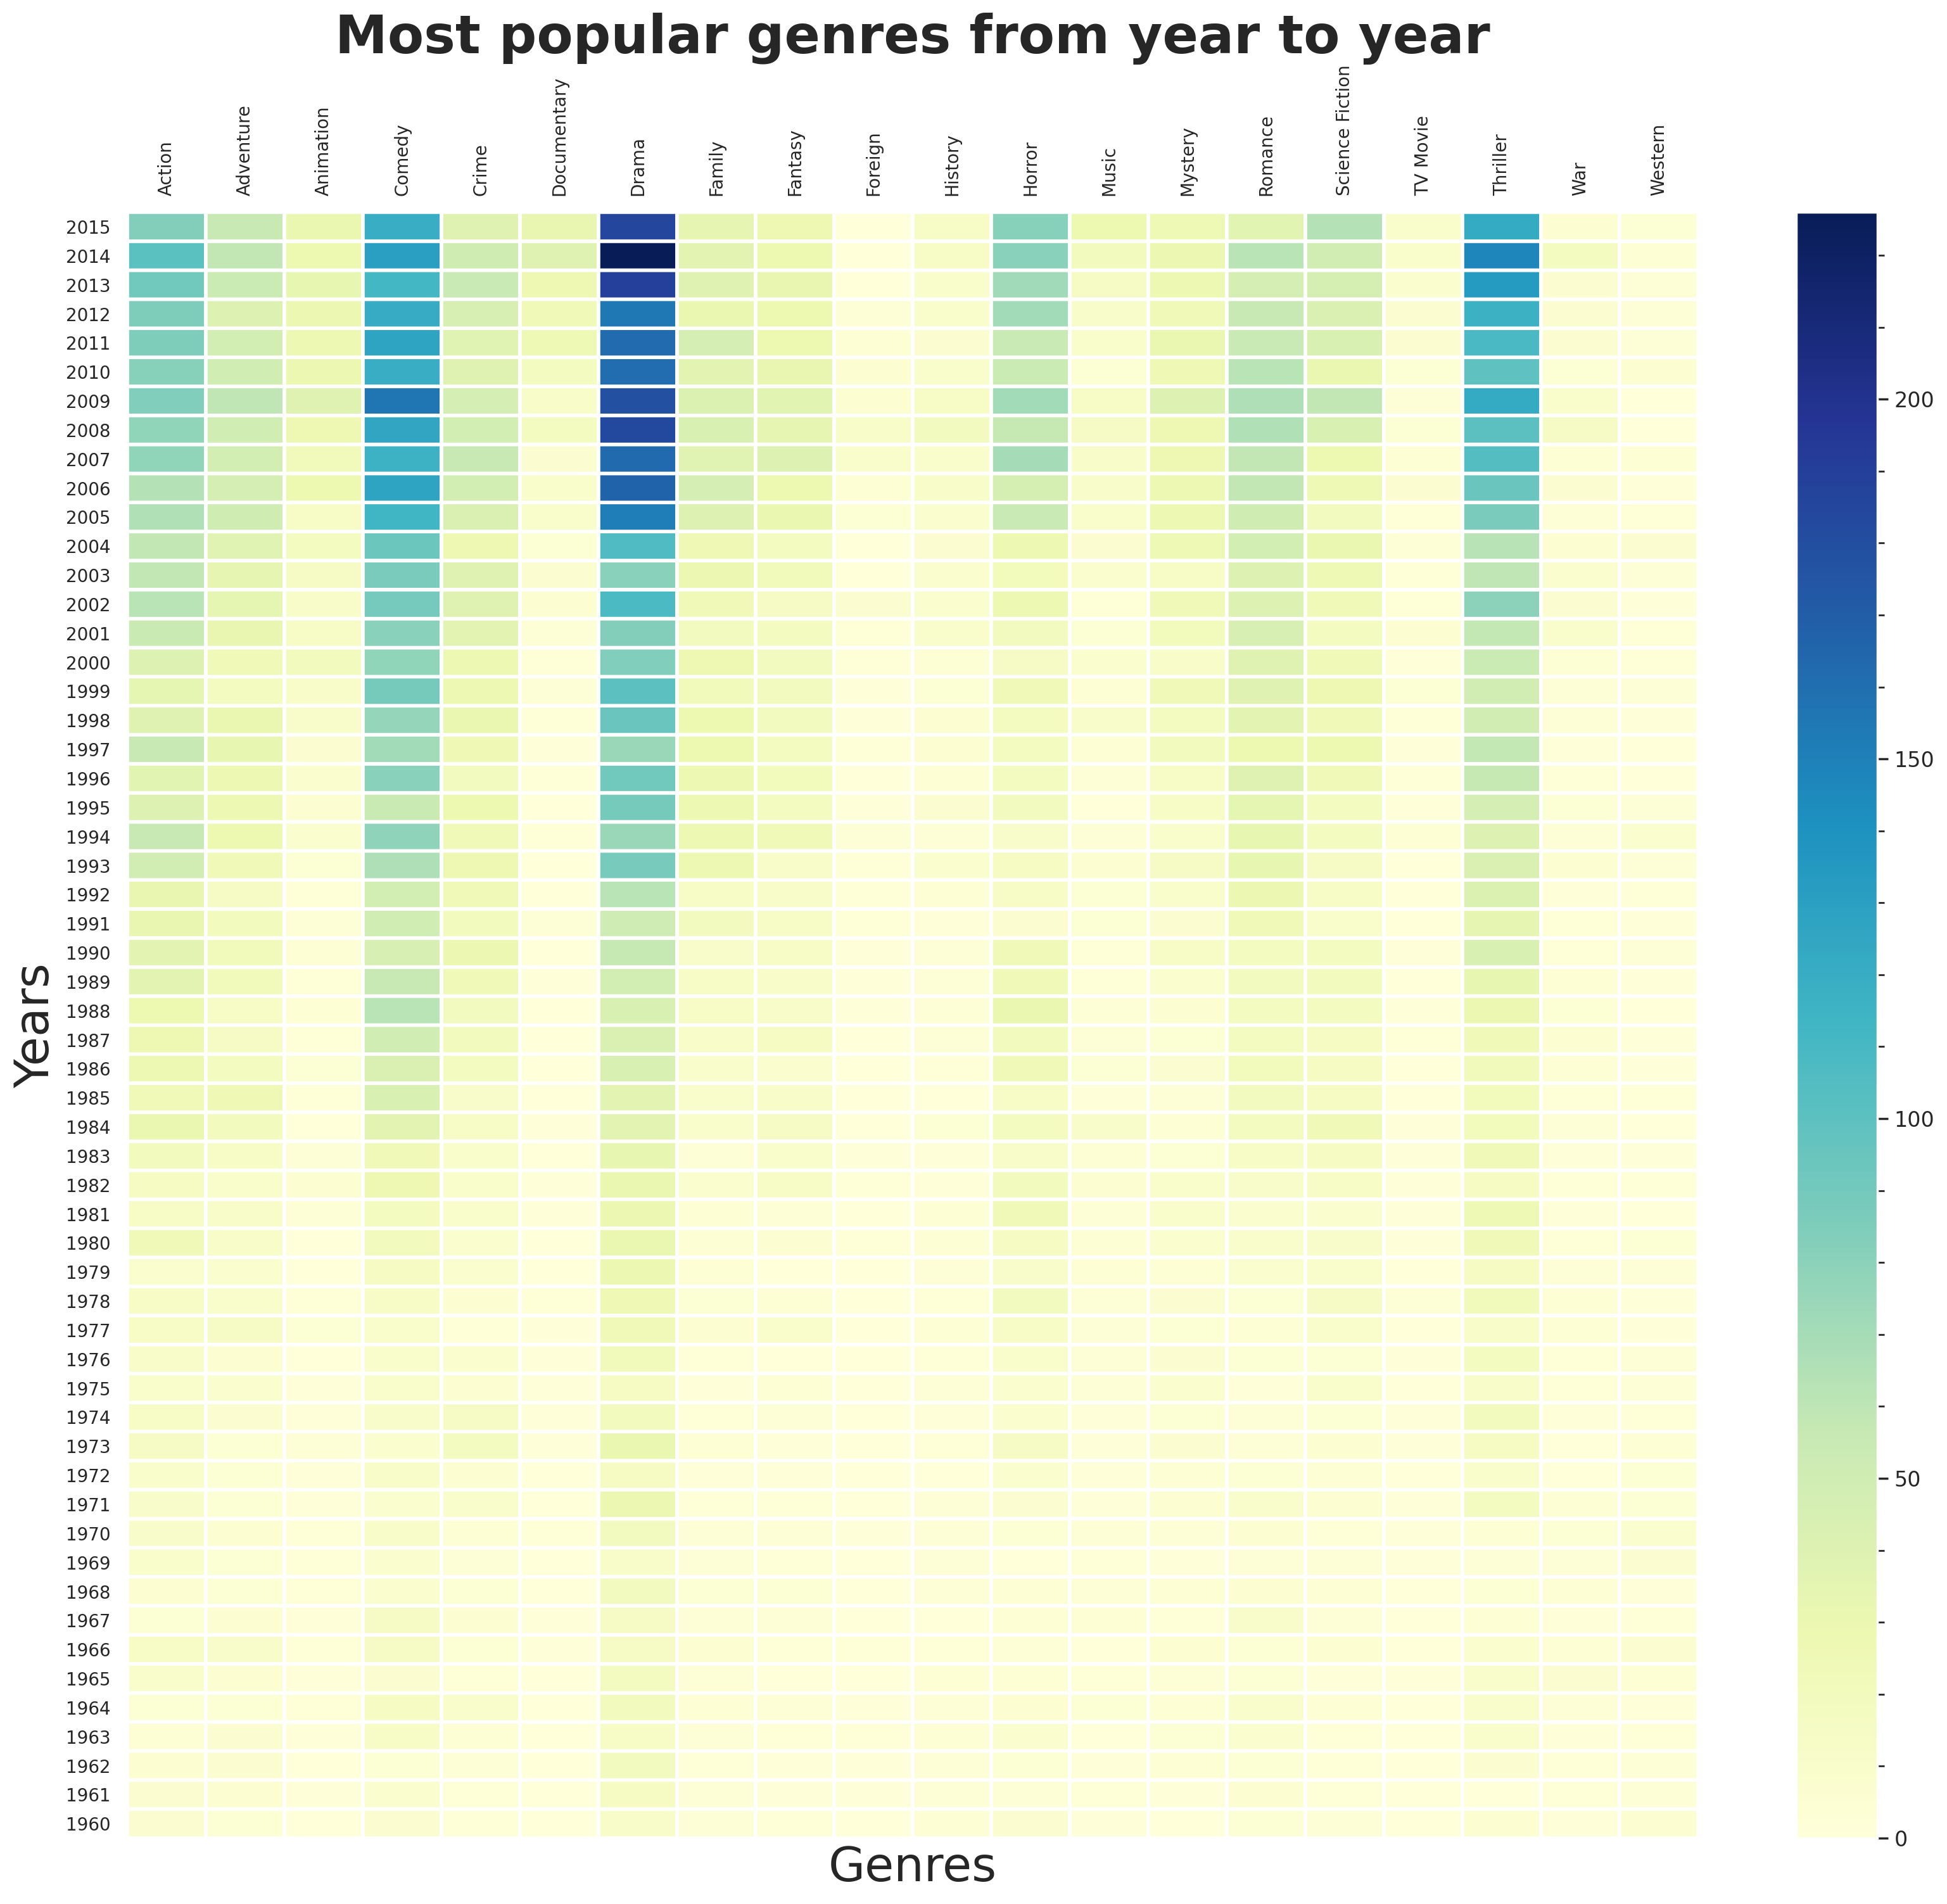

In [37]:
#visualization
plt.figure(figsize=(20, 17), dpi=200)
plt.pcolor(gen_df, cmap="YlGnBu", edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(gen_df.columns), 1), gen_df.columns, fontsize=25, rotation=90)
plt.yticks(np.arange(0.5, len(gen_df.index), 1), gen_df.index, fontsize=25)
plt.title('Most popular genres from year to year', fontsize=30, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xlabel('Genres', fontsize= 27,)
plt.ylabel('Years', fontsize=27)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12) 
cbar.ax.minorticks_on()

In [38]:
plt.show()

#### We can conclude from the heat map that old movies (60's) used to be of genre 'Drama'. With the start of a new decade (70's), a new genre joined the map which is 'Thriller', and with th start of 80's, 'Comedy' genre started to be more common as well and became even more popular than 'Thriller'.

### Research Question 3 : Top 10 directors who directed the highest number of movies

In [39]:
# getting director names for each movie and separating them
dum=get_cat(tmdb['director'])

In [40]:
# converting the output to a dataframe
dum= pd.DataFrame(dum)
dum=dum[['index',0]].sort_values(0, ascending=False).head(10)
dum

,index,0
5282,Woody Allen,46
939,Clint Eastwood,34
3359,Martin Scorsese,31
4857,Steven Spielberg,30
4263,Ridley Scott,23
4856,Steven Soderbergh,23
4418,Ron Howard,22
2499,Joel Schumacher,21
618,Brian De Palma,20
4981,Tim Burton,20


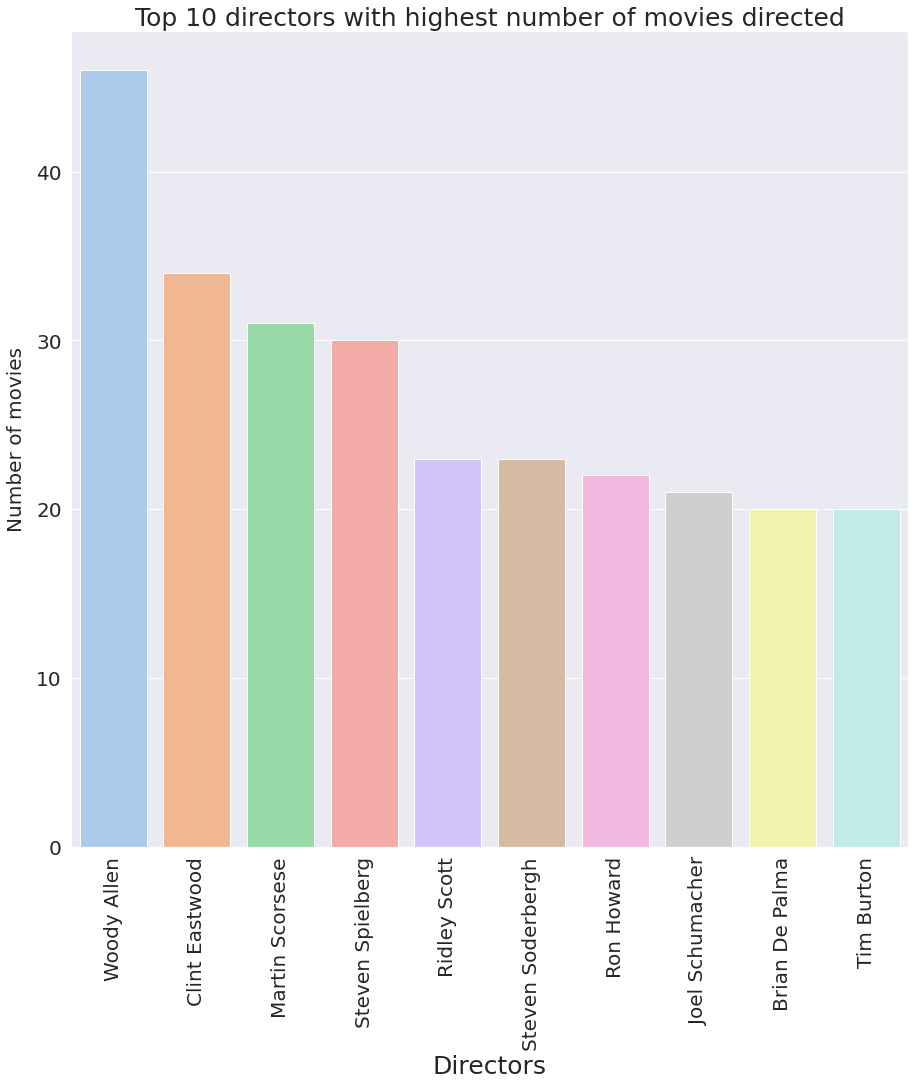

In [41]:
# visualization
plt.figure(figsize=(15,15))
sns.barplot(x='index', y=0, data= dum, palette='pastel')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Directors', fontsize=25)
plt.ylabel('Number of movies', fontsize=20, labelpad=10)
plt.title('Top 10 directors with highest number of movies directed', fontsize=25)
plt.show()

#### We conclude that the highest 3 movie production rate goes to:<br>
1. Woody Allen (46 movies)<br>
2. Clint Eastwood	(34 movies)<br>
3. Martin Scorsese	(31 movies)

### Research Question 4 : What's the highest 5 movie profits?

In [42]:
tmdb_profit= tmdb.loc[:,:]
tmdb_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   keywords              9372 non-null   object        
 8   runtime               10865 non-null  int64         
 9   genres                10842 non-null  object        
 10  production_companies  9835 non-null   object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_count            10865 non-null  int64         
 13  vote_average    

In [43]:
# calculating profit
tmdb_profit['profit'] = tmdb_profit['revenue'] - tmdb_profit['budget']
tmdb_profit.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


In [44]:
# getting the max 5 profits
tmdb_profit.original_title[tmdb_profit['profit']==tmdb_profit['profit'].max()]

1386    Avatar
Name: original_title, dtype: object

#### Checking the properties of the most 5 profitable movies 

In [45]:
# sorting values
tmdb_max=tmdb_profit.sort_values('profit', ascending=False).head(5)
tmdb_max

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


In [46]:
tmdb_max['runtime'].mean()

150.6

In [47]:
get_cat(tmdb_max['production_companies'])

,index,0
0,Amblin Entertainment,1
1,Bad Robot,1
2,Dentsu,2
3,Dune Entertainment,1
4,Fuji Television Network,1
5,Ingenious Film Partners,1
6,Legendary Pictures,1
7,Lightstorm Entertainment,2
8,Lucasfilm,1
9,Media Rights Capital,1


In [48]:
get_cat(tmdb_max['genres'])

,index,0
0,Action,4
1,Adventure,3
2,Crime,1
3,Drama,1
4,Fantasy,2
5,Romance,1
6,Science Fiction,3
7,Thriller,3


In [49]:
tmdb_max['release_year'].value_counts()

2015    3
1997    1
2009    1
Name: release_year, dtype: int64

In [50]:
tmdb_max['director'].value_counts()

James Cameron      2
Colin Trevorrow    1
J.J. Abrams        1
James Wan          1
Name: director, dtype: int64

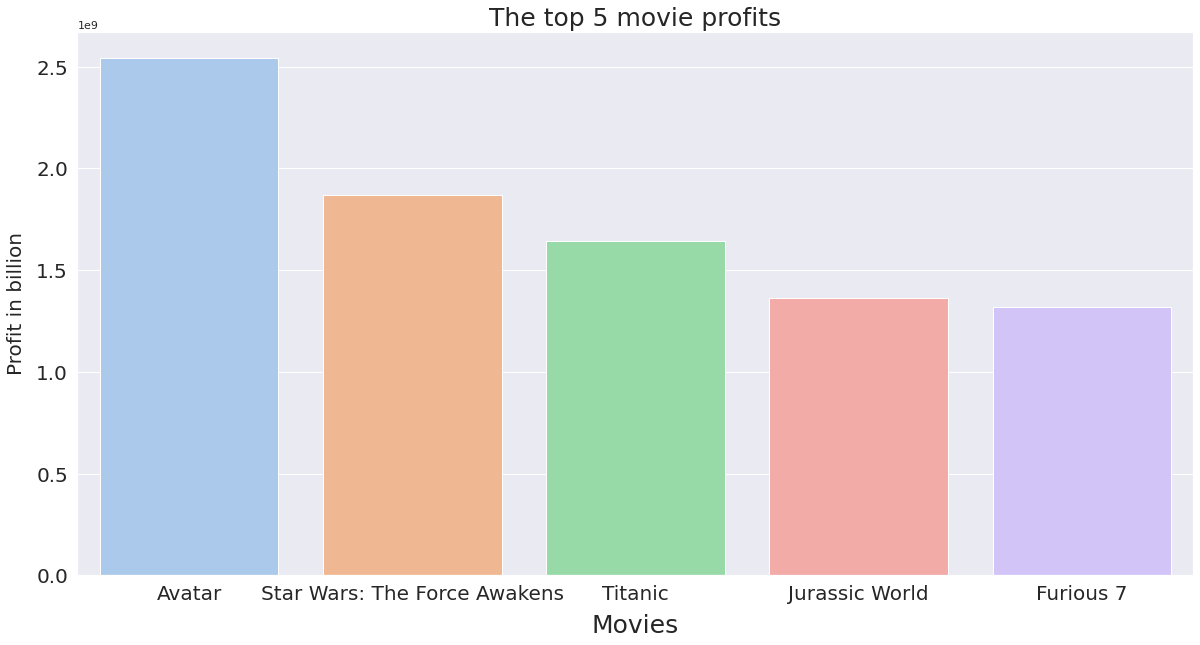

In [51]:
# visualization
plt.figure(figsize=(20,10))
sns.barplot(x='original_title', y='profit', data= tmdb_max, palette='pastel')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Movies', fontsize=25, labelpad=10)
plt.ylabel('Profit in billion', labelpad=10, fontsize=20)
plt.title('The top 5 movie profits', fontsize=25)
plt.show()

#### We can conclude that up until 2015 'Avatar' has been the movie with the highest profits since 1960, it's profit reached around 2.5 billion USD, we can see that it was the only movie that broke the 2 billion USD record.

### Research Question 5 : What are the least 5 movie profits?

In [52]:
# getting the min 5 profits
tmdb_profit.original_title[tmdb_profit['profit']==tmdb_profit['profit'].min()]

2244    The Warrior's Way
Name: original_title, dtype: object

In [53]:
# sorting values
tmdb_min=tmdb_profit[['original_title','profit','genres']].sort_values('profit', ascending=False).tail(5)
# converting getting the absolute value of the profits turning them into 'Loss'
tmdb_min['Loss']=tmdb_min['profit']*-1
tmdb_min

,original_title,profit,genres,Loss
7031,The Alamo,-119180039,Western|History|War,119180039
2214,The Pacific,-120000000,War|Drama|Action|Adventure|History,120000000
2069,The Wolfman,-150000000,Horror|Thriller|Drama,150000000
5508,The Lone Ranger,-165710090,Action|Adventure|Western,165710090
2244,The Warrior's Way,-413912431,Adventure|Fantasy|Action|Western|Thriller,413912431


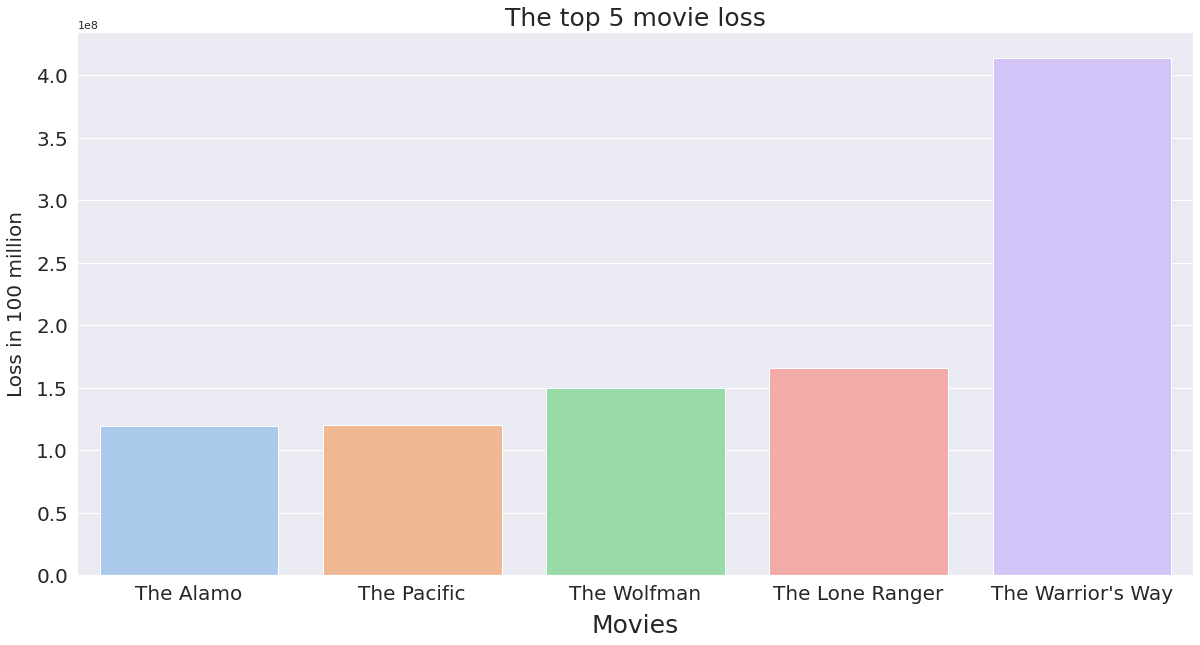

In [54]:
# visualization
plt.figure(figsize=(20,10))
sns.barplot(x='original_title', y='Loss', data= tmdb_min, palette='pastel')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Movies', fontsize=25, labelpad=10)
plt.ylabel('Loss in 100 million', labelpad=10, fontsize=20)
plt.title('The top 5 movie loss', fontsize=25)
plt.show()

#### As we can see, the least profit over the years from 1960 to 2015 has been actually the biggest loss in the history of movie production. 'The Warrior's Way' has lost about 400 million USD, taking the 1st spot, while the 2nd spot went to 'The Lone Ranger' with only about 170 million USD loss.

## Further inspection

### Runtime inspection

In [55]:
time=tmdb.loc[:,['runtime','release_year']]
time.head()

,runtime,release_year
0,124,2015
1,120,2015
2,119,2015
3,136,2015
4,137,2015


In [56]:
time['runtime']=time[time['runtime']>40]
time= time.groupby('release_year').mean()
time.head()

,runtime
release_year,
1960,110.656250
1961,119.419355
1962,124.343750
1963,114.151515
1964,111.195122


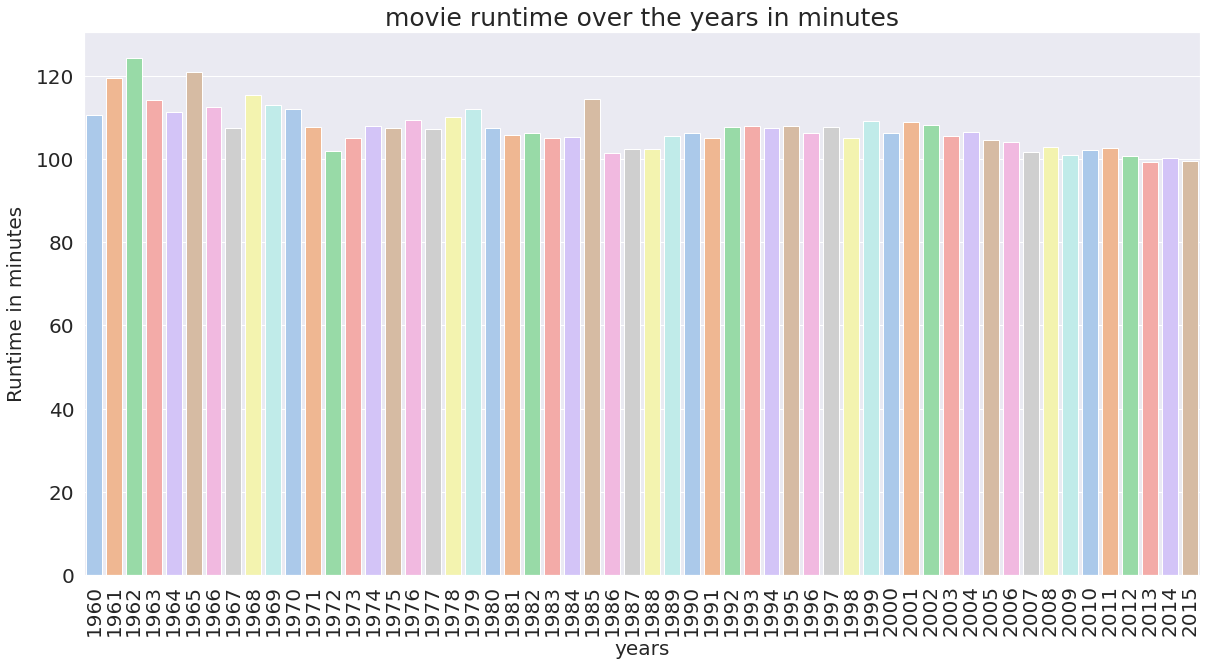

In [57]:
# visualization
plt.figure(figsize=(20,10))
sns.barplot(x=time.index, y='runtime', data= time, palette='pastel')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('years', fontsize=20)
plt.ylabel('Runtime in minutes', fontsize=20, labelpad=10)
plt.title('movie runtime over the years in minutes',fontsize=25)
plt.show()

##### As we can see too, the average runtime has decreased over the years

### Vote Count inspection

In [58]:
vote=tmdb.loc[:,['vote_count','release_year']]
vote.describe()

,vote_count,release_year
count,10865.000000,10865.000000
mean,217.399632,2001.321859
std,575.644627,12.813260
min,10.000000,1960.000000
25%,17.000000,1995.000000
50%,38.000000,2006.000000
75%,146.000000,2011.000000
max,9767.000000,2015.000000


In [59]:
vote= vote.groupby('release_year').sum()
vote.head()

,vote_count
release_year,
1960,2481
1961,2405
1962,2392
1963,2816
1964,3137


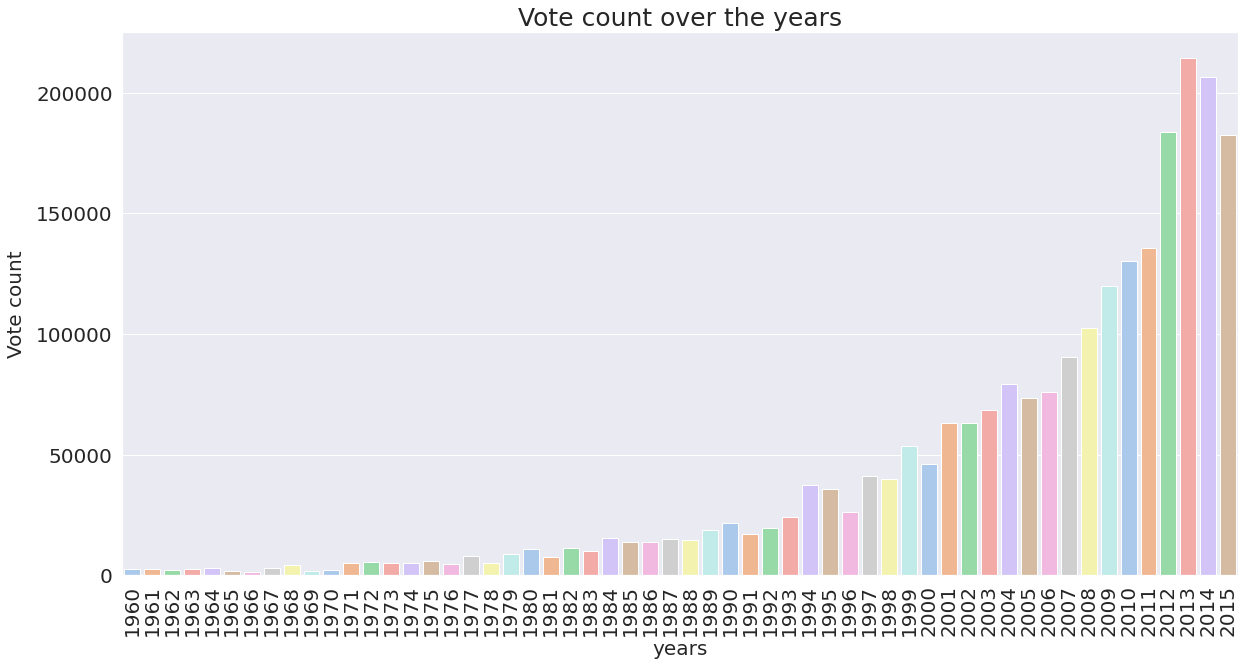

In [60]:
# visualization
plt.figure(figsize=(20,10))
sns.barplot(x=vote.index, y='vote_count', data= vote, palette='pastel')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('years', fontsize=20)
plt.ylabel('Vote count', fontsize=20, labelpad=10)
plt.title('Vote count over the years',fontsize=25)
plt.show()

#### As we see here, the vote count has increased over the years. We can also see that 2013 had the highest overall vote counts

### Number of released movies per year

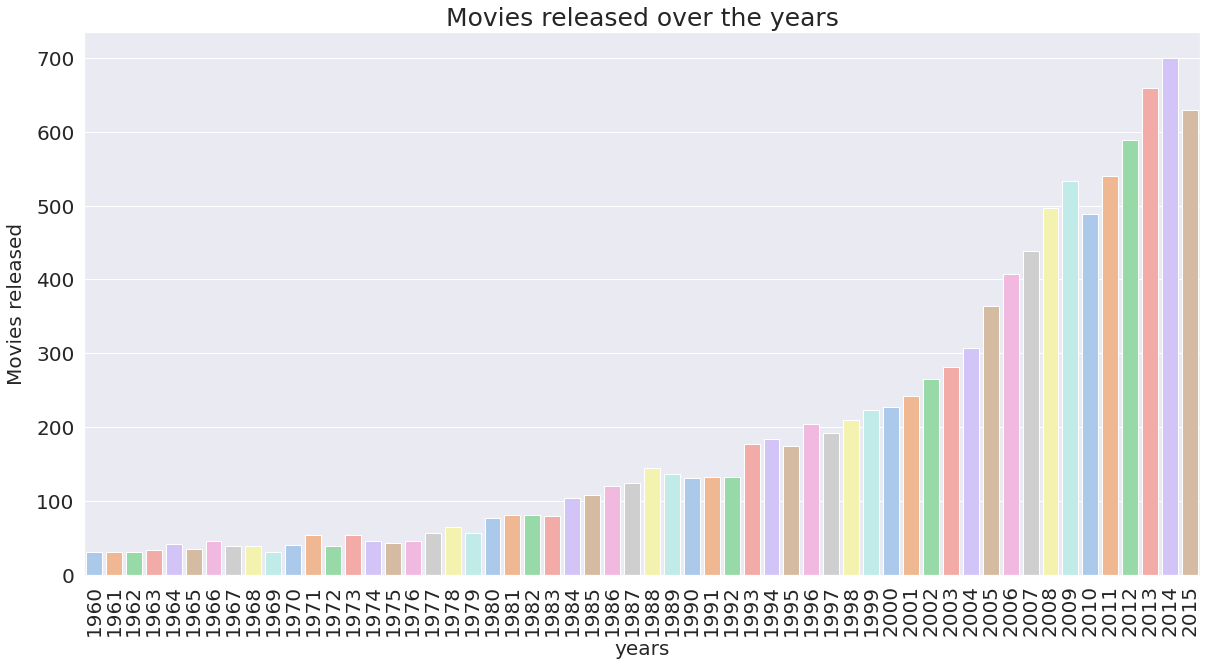

In [63]:
# visualization
plt.figure(figsize=(20,10))
sns.countplot(x= tmdb['release_year'], palette='pastel')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('years', fontsize=20)
plt.ylabel('Movies released', fontsize=20, labelpad=10)
plt.title('Movies released over the years',fontsize=25)
plt.show()

As shown above, it's obvious that 2014 has been the year with most movie releases.

## Conclusion

In the first section we examined the most common Movie genres over the decades. I built my analysis based on the values of 'release_year' and the 'genres'. I could find that people have always preferred specific movie genres which are: Drama, Comedy and Thriller.<br>
<br>
After that we analyed the most 5 movie profits, from the results we can observe that:<br>
1. The most movie profits belonged to movies with average 'runtime' = 150.6 minutes<br>
2. 2 of these movies were directed by 'James Cameron'.<br>
3. 2 of them were produced by 'Twentieth Century Fox Film Corporation', as well as 'Lightstorm Entertainment' and 'Dentsu'.<br>
4. 3 of them were released in 2015.<br>
5. 4 of them were 'Action' movies

### Limitations:

1. We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset.<br>
2. We have no informations about the popularity and how it's measured, thus we couldn't use it in our analysis.<br>
3. Half of the budget and revenue values are zeros which affected the statical analysis making the distribution skewed <br>
4. There are a lot of outliers in budget ,revenue and even more outliers in budget_adj and revenue_adj<br>
5. The dataset information are provided till 2015 only and isn't updated.